In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn=warn
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_excel('friday.xlsx', index_col=None, header=None, sheet_name='Лист2', nrows=51, skiprows=[0, 1], usecols='C:O')
data

,2,3,4,5,6,7,8,9,10,11,12,13,14
0,№ точки,2021-04-07 00:00:00,2021-05-03 00:00:00,2021-06-05 00:00:00,2021-07-31 00:00:00,2021-08-25 00:00:00,2021-09-17 00:00:00,2021-10-23 00:00:00,2021-11-05 00:00:00,2021-12-03 00:00:00,2022-01-05 00:00:00,Среднее,Линейная
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,связь
2,1-1,2.828427,1.414214,2.236068,1.414214,3.162278,1.0,1.414214,1.414214,3.605551,0,1.848918,False
3,1-2,1.414214,1.0,3.162278,1.414214,1.0,1.0,1.0,1.0,2.236068,0,1.322677,False
4,1-3,1.0,1.0,3.0,0,0,2.0,1.414214,1.0,2.236068,1.414214,1.30645,False
5,1-4,2.236068,1.0,4.123106,2.236068,4.123106,5.0,5.09902,5.09902,1.414214,4.0,3.43306,False
6,1-5,1.0,1.0,1.414214,1.0,2.236068,1.414214,3.605551,3.605551,2.236068,2.0,1.951167,True
7,1-6,NaN,NaN,NaN,1.414214,4.472136,3.162278,4.472136,5.0,2.0,3.605551,3.446616,False
8,2-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2-2,1.414214,1.0,5.09902,2.0,1.0,1.414214,1.414214,2.236068,2.236068,1.0,1.88138,False


In [4]:
select=(data[14]==True)
select[0]=True
df=data[select].drop(columns=[13, 14]).T
df.columns=df.loc[2]
df.drop(index=2, inplace=True)
df.rename(columns={'№ точки':'time'}, inplace=True)
df.reset_index(drop=True, inplace=True)
df.time=df.time.apply(lambda x: x.strftime('%Y-%m'))
df.index = pd.DatetimeIndex(data=df.time, freq='infer')
df.drop(columns='time', inplace=True)
df.columns=[s.strip() for s in df.columns]
df.columns.name='points'
df=df.astype(float)
df

points,1-5,2-6,3-6,4-2,4-4,6-5,7-6
time,,,,,,,
2021-04-01,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
2021-05-01,1.000000,1.414214,0.000000,1.000000,1.414214,2.000000,0.000000
2021-06-01,1.414214,1.000000,2.000000,1.000000,2.000000,1.414214,1.000000
2021-07-01,1.000000,2.236068,0.000000,1.414214,1.000000,4.000000,2.000000
2021-08-01,2.236068,2.828427,1.000000,2.236068,1.414214,2.828427,2.000000
2021-09-01,1.414214,1.414214,2.236068,2.000000,2.236068,4.000000,1.000000
2021-10-01,3.605551,3.605551,1.414214,3.162278,2.236068,5.099020,3.162278
2021-11-01,3.605551,4.472136,2.236068,3.605551,3.605551,3.162278,1.414214
2021-12-01,2.236068,2.000000,2.236068,2.236068,2.236068,3.162278,2.236068


In [5]:
uno_punto=df['1-5']
uno_punto

time
2021-04-01    1.000000
2021-05-01    1.000000
2021-06-01    1.414214
2021-07-01    1.000000
2021-08-01    2.236068
2021-09-01    1.414214
2021-10-01    3.605551
2021-11-01    3.605551
2021-12-01    2.236068
2022-01-01    2.000000
Freq: MS, Name: 1-5, dtype: float64

In [6]:
uno_punto.index

DatetimeIndex(['2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01'],
              dtype='datetime64[ns]', name='time', freq='MS')

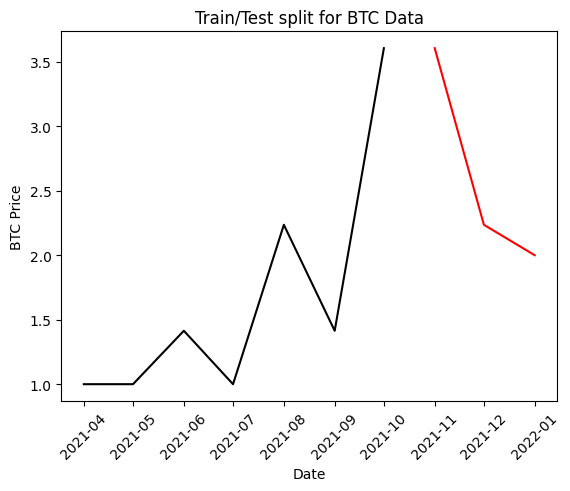

In [7]:
train = uno_punto[uno_punto.index < pd.to_datetime("2021-11-01", format='%Y-%m-%d')]
test = uno_punto[uno_punto.index >= pd.to_datetime("2021-11-01", format='%Y-%m-%d')]

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data");

In [46]:
ARIMAmodel = ARIMA(train, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

C:\Users\kashura\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [4]:
df.time

0    2021-04-07 00:00:00
1    2021-05-03 00:00:00
2    2021-06-05 00:00:00
3    2021-07-31 00:00:00
4    2021-08-25 00:00:00
5    2021-09-17 00:00:00
6    2021-10-23 00:00:00
7    2021-11-05 00:00:00
8    2021-12-03 00:00:00
9    2022-01-05 00:00:00
Name: time, dtype: object

In [5]:

df

DatetimeIndex(['2021-04-07', '2021-05-03', '2021-06-05', '2021-07-31',
               '2021-08-25', '2021-09-17', '2021-10-23', '2021-11-05',
               '2021-12-03', '2022-01-05'],
              dtype='datetime64[ns]', name='time', freq=None)

In [43]:
ndf=df.set_index('time', drop=True)

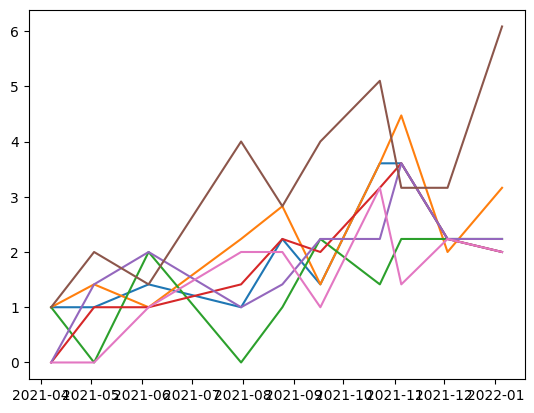

In [47]:
plt.plot(ndf)

In [8]:
data=pd.read_excel('friday.xlsx', index_col=None, header=None, sheet_name='Лист4', nrows=9, skiprows=[0, 1, 3], usecols='B,D:X')
data

,1,3,4,5,6,7,8,9,10,11,...,14,15,16,17,18,19,20,21,22,23
0,№ точки,2021-04-07 00:00:00,2021-05-03 00:00:00,2021-06-05 00:00:00,2021-07-31 00:00:00,2021-08-25 00:00:00,2021-09-17 00:00:00,2021-10-23 00:00:00,2021-11-05 00:00:00,2021-12-03 00:00:00,...,2022-03-11 00:00:00,2022-04-15 00:00:00,2022-05-10 00:00:00,2022-06-02 00:00:00,2022-07-07 00:00:00,2022-09-09 00:00:00,2022-11-19 00:00:00,2022-12-09 00:00:00,2023-01-12 00:00:00,2023-02-28 00:00:00
1,1-5,1.0,1.0,1.414214,1.0,2.236068,1.414214,3.605551,3.605551,2.236068,...,2.236068,2.828427,4.123106,4.123106,2.828427,2.236068,2.236068,4.123106,5.0,2.828427
2,2-6,1.0,1.414214,1.0,2.236068,2.828427,1.414214,3.605551,4.472136,2.0,...,3.162278,2.828427,3.162278,3.162278,2.0,2.0,2.828427,2.828427,4.242641,2.236068
3,3-6,1.0,0,2.0,0,1.0,2.236068,1.414214,2.236068,2.236068,...,2.828427,1.0,1.414214,3.605551,3.162278,1.414214,2.236068,1.414214,1.414214,1.0
4,4-2,0,1.0,1.0,1.414214,2.236068,2.0,3.162278,3.605551,2.236068,...,1.0,2.828427,2.0,1.0,3.162278,2.0,2.236068,1.0,3.605551,2.236068
5,4-4,0,1.414214,2.0,1.0,1.414214,2.236068,2.236068,3.605551,2.236068,...,3.162278,1.0,2.236068,2.236068,4.0,2.236068,2.0,1.414214,2.0,0
6,6-5,1.0,2.0,1.414214,4.0,2.828427,4.0,5.09902,3.162278,3.162278,...,2.236068,4.0,2.236068,2.236068,2.236068,5.830952,5.385165,7.071068,5.0,3.162278
7,7-6,0,0,1.0,2.0,2.0,1.0,3.162278,1.414214,2.236068,...,2.236068,13.453624,13.892444,2.0,2.0,12.206556,9.848858,6.082763,4.472136,3.162278
8,7-7,2.828427,2.236068,3.162278,6.708204,NaN,3.605551,5.09902,4.0,3.0,...,4.123106,6.324555,5.09902,2.236068,2.236068,4.123106,6.0,9.219544,11.18034,10.440307


In [9]:
df=data.T
df.columns=df.loc[1]
df.drop(index=1, inplace=True)

df.rename(columns={'№ точки':'time'}, inplace=True)
df.reset_index(drop=True, inplace=True)
df.time=df.time.apply(lambda x: x.strftime('%Y-%m'))

df.index = pd.DatetimeIndex(data=df.time, freq='infer')
df.drop(columns='time', inplace=True)
df.columns=[s.strip() for s in df.columns]
df.columns.name='points'
df=df.astype(float)

# df_addition=df.iloc[15:17].mean().to_frame().T
# df_addition.index=pd.DatetimeIndex(data=['2022-08'])
# df=pd.concat([df, df_addition]).sort_index()
df=df.asfreq('SMS')
df.interpolate(axis=0, inplace=True)

df

points,1-5,2-6,3-6,4-2,4-4,6-5,7-6,7-7
time,,,,,,,,
2021-04-01,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.828427
2021-04-15,1.000000,1.207107,0.500000,0.500000,0.707107,1.500000,0.000000,2.532248
2021-05-01,1.000000,1.414214,0.000000,1.000000,1.414214,2.000000,0.000000,2.236068
2021-05-15,1.207107,1.207107,1.000000,1.000000,1.707107,1.707107,0.500000,2.699173
2021-06-01,1.414214,1.000000,2.000000,1.000000,2.000000,1.414214,1.000000,3.162278
2021-06-15,1.207107,1.618034,1.000000,1.207107,1.500000,2.707107,1.500000,4.935241
2021-07-01,1.000000,2.236068,0.000000,1.414214,1.000000,4.000000,2.000000,6.708204
2021-07-15,1.618034,2.532248,0.500000,1.825141,1.207107,3.414214,2.000000,5.932541
2021-08-01,2.236068,2.828427,1.000000,2.236068,1.414214,2.828427,2.000000,5.156878


In [10]:
df.index

DatetimeIndex(['2021-04-01', '2021-04-15', '2021-05-01', '2021-05-15',
               '2021-06-01', '2021-06-15', '2021-07-01', '2021-07-15',
               '2021-08-01', '2021-08-15', '2021-09-01', '2021-09-15',
               '2021-10-01', '2021-10-15', '2021-11-01', '2021-11-15',
               '2021-12-01', '2021-12-15', '2022-01-01', '2022-01-15',
               '2022-02-01', '2022-02-15', '2022-03-01', '2022-03-15',
               '2022-04-01', '2022-04-15', '2022-05-01', '2022-05-15',
               '2022-06-01', '2022-06-15', '2022-07-01', '2022-07-15',
               '2022-08-01', '2022-08-15', '2022-09-01', '2022-09-15',
               '2022-10-01', '2022-10-15', '2022-11-01', '2022-11-15',
               '2022-12-01', '2022-12-15', '2023-01-01', '2023-01-15',
               '2023-02-01'],
              dtype='datetime64[ns]', name='time', freq='SMS-15')

In [11]:
uno_punto=df['1-5']
uno_punto

time
2021-04-01    1.000000
2021-04-15    1.000000
2021-05-01    1.000000
2021-05-15    1.207107
2021-06-01    1.414214
2021-06-15    1.207107
2021-07-01    1.000000
2021-07-15    1.618034
2021-08-01    2.236068
2021-08-15    1.825141
2021-09-01    1.414214
2021-09-15    2.509882
2021-10-01    3.605551
2021-10-15    3.605551
2021-11-01    3.605551
2021-11-15    2.920810
2021-12-01    2.236068
2021-12-15    2.118034
2022-01-01    2.000000
2022-01-15    2.802776
2022-02-01    3.605551
2022-02-15    2.920810
2022-03-01    2.236068
2022-03-15    2.532248
2022-04-01    2.828427
2022-04-15    3.475766
2022-05-01    4.123106
2022-05-15    4.123106
2022-06-01    4.123106
2022-06-15    3.475766
2022-07-01    2.828427
2022-07-15    2.680337
2022-08-01    2.532248
2022-08-15    2.384158
2022-09-01    2.236068
2022-09-15    2.236068
2022-10-01    2.236068
2022-10-15    2.236068
2022-11-01    2.236068
2022-11-15    3.179587
2022-12-01    4.123106
2022-12-15    4.561553
2023-01-01    5.000000
2023-0

In [12]:
uno_punto.index

DatetimeIndex(['2021-04-01', '2021-04-15', '2021-05-01', '2021-05-15',
               '2021-06-01', '2021-06-15', '2021-07-01', '2021-07-15',
               '2021-08-01', '2021-08-15', '2021-09-01', '2021-09-15',
               '2021-10-01', '2021-10-15', '2021-11-01', '2021-11-15',
               '2021-12-01', '2021-12-15', '2022-01-01', '2022-01-15',
               '2022-02-01', '2022-02-15', '2022-03-01', '2022-03-15',
               '2022-04-01', '2022-04-15', '2022-05-01', '2022-05-15',
               '2022-06-01', '2022-06-15', '2022-07-01', '2022-07-15',
               '2022-08-01', '2022-08-15', '2022-09-01', '2022-09-15',
               '2022-10-01', '2022-10-15', '2022-11-01', '2022-11-15',
               '2022-12-01', '2022-12-15', '2023-01-01', '2023-01-15',
               '2023-02-01'],
              dtype='datetime64[ns]', name='time', freq='SMS-15')

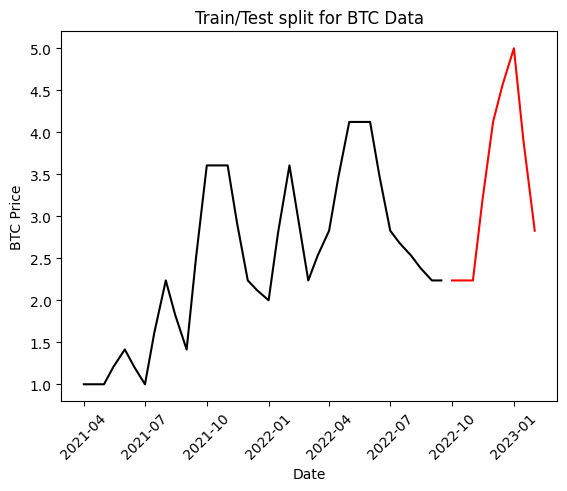

In [13]:
train = uno_punto[uno_punto.index < pd.to_datetime("2022-10-01", format='%Y-%m-%d')]
test = uno_punto[uno_punto.index >= pd.to_datetime("2022-10-01", format='%Y-%m-%d')]

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data");

In [14]:
train

time
2021-04-01    1.000000
2021-04-15    1.000000
2021-05-01    1.000000
2021-05-15    1.207107
2021-06-01    1.414214
2021-06-15    1.207107
2021-07-01    1.000000
2021-07-15    1.618034
2021-08-01    2.236068
2021-08-15    1.825141
2021-09-01    1.414214
2021-09-15    2.509882
2021-10-01    3.605551
2021-10-15    3.605551
2021-11-01    3.605551
2021-11-15    2.920810
2021-12-01    2.236068
2021-12-15    2.118034
2022-01-01    2.000000
2022-01-15    2.802776
2022-02-01    3.605551
2022-02-15    2.920810
2022-03-01    2.236068
2022-03-15    2.532248
2022-04-01    2.828427
2022-04-15    3.475766
2022-05-01    4.123106
2022-05-15    4.123106
2022-06-01    4.123106
2022-06-15    3.475766
2022-07-01    2.828427
2022-07-15    2.680337
2022-08-01    2.532248
2022-08-15    2.384158
2022-09-01    2.236068
2022-09-15    2.236068
Freq: SMS-15, Name: 1-5, dtype: float64

In [15]:
train.mean()

2.4629823837425904

In [17]:
dummy_pred=pd.Series(np.full((test.shape),train.mean(),dtype=float))
dummy_pred.index=test.index
dummy_pred

time
2022-10-01    2.462982
2022-10-15    2.462982
2022-11-01    2.462982
2022-11-15    2.462982
2022-12-01    2.462982
2022-12-15    2.462982
2023-01-01    2.462982
2023-01-15    2.462982
2023-02-01    2.462982
Freq: SMS-15, dtype: float64

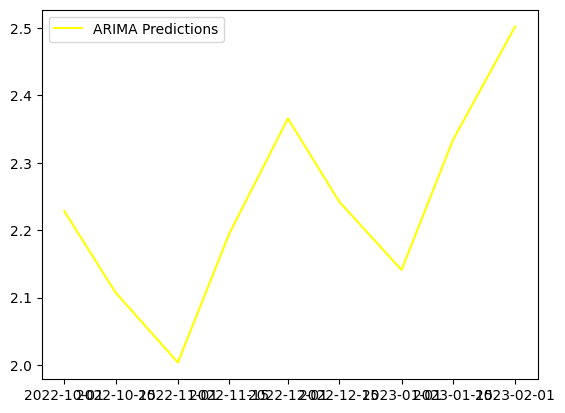

In [18]:
#ARIMAmodel = ARIMA(train, order = (3, 3, 4), enforce_invertibility=False, trend='t')
ARIMAmodel = ARIMA(train, order = (3, 2, 4), enforce_invertibility=False)
ARIMAmodel = ARIMAmodel.fit()
y_pred = ARIMAmodel.get_forecast(len(test.index))

y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


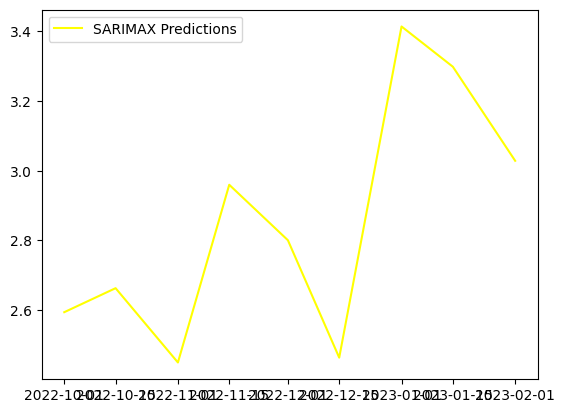

In [19]:
SARIMAXmodel = SARIMAX(train, order = (2, 3, 2), seasonal_order=(2,3,1,3), enforce_invertibility=False)
SARIMAXmodel = SARIMAXmodel.fit(maxiter=200)
srmx_y_pred = SARIMAXmodel.get_forecast(len(test.index))

srmx_y_pred_df = srmx_y_pred.conf_int(alpha = 0.05) 
srmx_y_pred_df["Predictions"] = SARIMAXmodel.predict(start = srmx_y_pred_df.index[0], end = srmx_y_pred_df.index[-1])
srmx_y_pred_df.index = test.index
y_pred_out = srmx_y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'SARIMAX Predictions')
plt.legend()

In [20]:
arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ",arma_rmse)
sarimax_rmse = np.sqrt(mean_squared_error(test.values, srmx_y_pred_df["Predictions"]))
print("SARIMAX RMSE: ",sarimax_rmse)
dummy_rmse = np.sqrt(mean_squared_error(test.values, dummy_pred.values))
print("Dummy RMSE: ",dummy_rmse)

ARIMA RMSE:  1.501457638916838
SARIMAX RMSE:  1.0268462482262062
Dummy RMSE:  1.354173775843443


In [21]:
from itertools import combinations_with_replacement, product
def permutations_with_replacement(n, m):
    for i in product(list(range(1, m + 1)), repeat=n):
        yield i

In [84]:
seasonal_orders=list(permutations_with_replacement(4, 4))
orders=list(permutations_with_replacement(3, 5))
len(seasonal_orders)

256

In [85]:
125*256

32000

In [98]:
shee=[1, 2, 3, 180, 0]
nig=['i','d','w','r']
np.tile(shee, (len(nig), 1))

array([[  1,   2,   3, 180,   0],
       [  1,   2,   3, 180,   0],
       [  1,   2,   3, 180,   0],
       [  1,   2,   3, 180,   0]])

In [101]:
np.tile(shee, (len(nig), 1)).shape

(4, 5)

In [ ]:
seasonal_orders

In [127]:
conc=np.tile(orders, (len(seasonal_orders), 1)).reshape((len(seasonal_orders),len(orders), 3)).tolist()
c2=[[tuple(el) for el in l] for l in conc]
c2[0]

[(1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 2, 5),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 3, 5),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (2, 4, 5),
 (2, 5, 1),
 (2, 5, 2),
 (2, 5, 3),
 (2, 5, 4),
 (2, 5, 5),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 2, 4),
 (3, 2, 5),
 (3, 3, 1),
 (3, 3, 2),
 (3, 3, 3),
 (3, 3, 4),
 (3, 3, 5),
 (3, 4, 1),
 (3, 4, 2),
 (3, 4, 3),
 (3, 4, 4),
 (3, 4, 5),
 (3, 5, 1),
 (3, 5, 2),
 (3, 5, 3),
 (3, 5, 4),
 (3, 5, 5),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 2, 1),
 (4, 2, 2),
 (4, 2, 3),
 (4,

In [139]:
cv_results.iloc[0].loc['seasonal_orders']

(1, 1, 1, 1)

In [144]:
cv_results=pd.DataFrame()
cv_results['seasonal_orders']=seasonal_orders
ordrs=np.tile(orders, (len(seasonal_orders), 1)).reshape((len(seasonal_orders),len(orders), 3)).tolist()
ordrs=[[tuple(el) for el in l] for l in ordrs]
cv_results['orders']=ordrs
cv_results=cv_results.explode(column='orders').sort_values(by=['seasonal_orders','orders']).reset_index(drop=True)
results=np.full((cv_results.shape[0],),-1,dtype=float)

for (index, (s_ordr, ordr)) in cv_results.iterrows():
    if (index%1000==0):
        print(index)
    try:
        SARIMAXmodel = SARIMAX(train, order = ordr, seasonal_order=s_ordr, enforce_invertibility=False)
        SARIMAXmodel = SARIMAXmodel.fit(maxiter=200)
        srmx_y_pred = SARIMAXmodel.get_forecast(len(test.index))

        srmx_y_pred_df = srmx_y_pred.conf_int(alpha = 0.05) 
        srmx_y_pred_df["Predictions"] = SARIMAXmodel.predict(start = srmx_y_pred_df.index[0], end = srmx_y_pred_df.index[-1])
        results[index]=np.sqrt(mean_squared_error(test.values, srmx_y_pred_df["Predictions"]))
    except:
        continue

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000


In [146]:
cv_results['results']=results

In [151]:
sorttt=cv_results.sort_values(by=['results','seasonal_orders','orders'], ascending=False).reset_index(drop=True)

In [163]:
sorttt[sorttt.results!=-1.0]

,seasonal_orders,orders,results
0,"(4, 4, 3, 2)","(1, 5, 1)",1.433239e+10
1,"(3, 4, 2, 4)","(3, 5, 2)",1.219947e+10
2,"(2, 4, 3, 2)","(1, 4, 1)",9.409641e+09
3,"(1, 4, 3, 2)","(1, 5, 1)",2.362826e+09
4,"(2, 4, 3, 2)","(1, 5, 1)",1.433658e+09
...,...,...,...
4446,"(4, 1, 4, 3)","(1, 4, 1)",7.509045e-01
4447,"(3, 1, 3, 3)","(1, 3, 1)",7.174784e-01
4448,"(3, 1, 4, 3)","(1, 3, 2)",7.115490e-01
4449,"(3, 1, 3, 3)","(1, 3, 2)",7.090920e-01


In [175]:
sorttt.iloc[4400:4450]

,seasonal_orders,orders,results
4400,"(2, 3, 1, 3)","(2, 2, 1)",0.986058
4401,"(3, 3, 1, 3)","(1, 2, 2)",0.985589
4402,"(4, 3, 4, 3)","(2, 2, 2)",0.984623
4403,"(2, 2, 1, 3)","(1, 2, 1)",0.974571
4404,"(1, 1, 1, 3)","(2, 3, 1)",0.968714
4405,"(2, 2, 2, 3)","(2, 3, 2)",0.961148
4406,"(3, 2, 1, 3)","(1, 2, 1)",0.955654
4407,"(1, 1, 3, 3)","(1, 2, 2)",0.953825
4408,"(1, 3, 1, 3)","(2, 2, 2)",0.952859
4409,"(4, 3, 1, 4)","(2, 1, 3)",0.943894


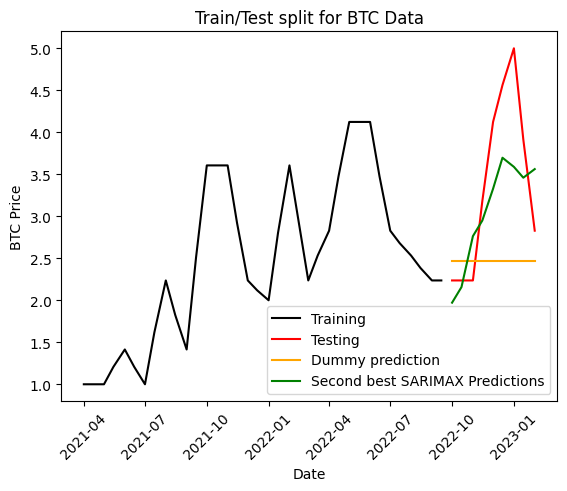

In [169]:
SARIMAXmodel = SARIMAX(train, order = (1, 3, 2), seasonal_order=(3, 1, 3, 3), enforce_invertibility=False)
SARIMAXmodel = SARIMAXmodel.fit(maxiter=200)
srmx_y_pred = SARIMAXmodel.get_forecast(len(test.index))

srmx_y_pred_df = srmx_y_pred.conf_int(alpha = 0.05) 
srmx_y_pred_df["Predictions"] = SARIMAXmodel.predict(start = srmx_y_pred_df.index[0], end = srmx_y_pred_df.index[-1])
srmx_y_pred_df.index = test.index
y_pred_out = srmx_y_pred_df["Predictions"] 



plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.plot(dummy_pred, color = "orange", label = 'Dummy prediction')
plt.plot(y_pred_out, color='green', label = 'Second best SARIMAX Predictions')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.title("Train/Test split for BTC Data");

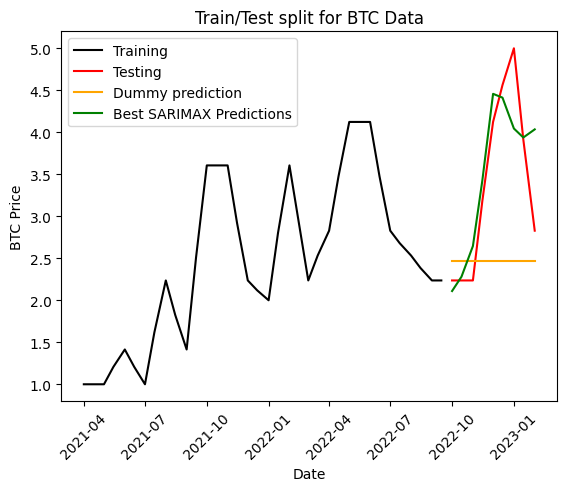

In [170]:
SARIMAXmodel = SARIMAX(train, order = (1, 2, 1), seasonal_order=(4, 2, 3, 3), enforce_invertibility=False)
SARIMAXmodel = SARIMAXmodel.fit(maxiter=200)
srmx_y_pred = SARIMAXmodel.get_forecast(len(test.index))

srmx_y_pred_df = srmx_y_pred.conf_int(alpha = 0.05) 
srmx_y_pred_df["Predictions"] = SARIMAXmodel.predict(start = srmx_y_pred_df.index[0], end = srmx_y_pred_df.index[-1])
srmx_y_pred_df.index = test.index
y_pred_out = srmx_y_pred_df["Predictions"] 



plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.plot(dummy_pred, color = "orange", label = 'Dummy prediction')
plt.plot(y_pred_out, color='green', label = 'Best SARIMAX Predictions')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.title("Train/Test split for BTC Data");

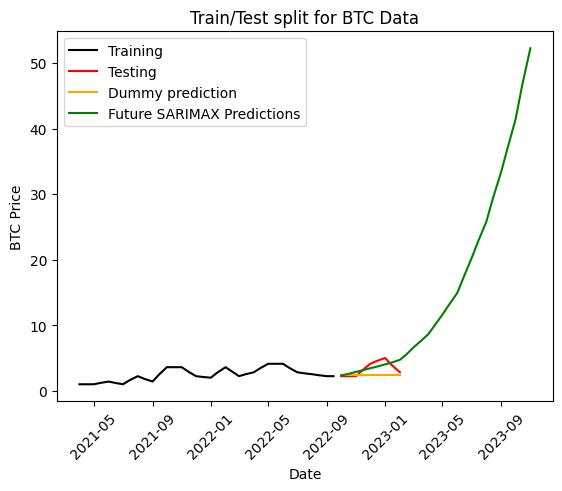

In [189]:
SARIMAXmodel = SARIMAX(train, order = (2,3,1), seasonal_order=(1,2,4,4), enforce_invertibility=False)
SARIMAXmodel = SARIMAXmodel.fit(maxiter=200)
srmx_y_pred = SARIMAXmodel.get_forecast(len(test.index)*3)
srmx_y_pred_df = srmx_y_pred.conf_int(alpha = 0.05) 
srmx_y_pred_df["Predictions"] = SARIMAXmodel.predict(start = srmx_y_pred_df.index[0], end = srmx_y_pred_df.index[-1])
y_pred_out = srmx_y_pred_df["Predictions"] 
plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.plot(dummy_pred, color = "orange", label = 'Dummy prediction')
plt.plot(y_pred_out, color='green', label = 'Future SARIMAX Predictions')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.title("Train/Test split for BTC Data");

In [171]:
srmx_y_pred = SARIMAXmodel.get_forecast(len(test.index)*3)

srmx_y_pred_df = srmx_y_pred.conf_int(alpha = 0.05) 
srmx_y_pred_df["Predictions"] = SARIMAXmodel.predict(start = srmx_y_pred_df.index[0], end = srmx_y_pred_df.index[-1])
srmx_y_pred_df

,lower 1-5,upper 1-5,Predictions
2022-10-01,1.255308,2.964772,2.110040
2022-10-15,-0.025101,4.586207,2.280553
2022-11-01,-1.353351,6.643959,2.645304
2022-11-15,-3.145876,9.993731,3.423928
2022-12-01,-5.552140,14.467427,4.457643
2022-12-15,-9.558162,18.383130,4.412484
2023-01-01,-14.661655,22.750887,4.044616
2023-01-15,-20.253437,28.129022,3.937793
2023-02-01,-26.207151,34.276025,4.034437
2023-02-15,-32.184007,42.205748,5.010870


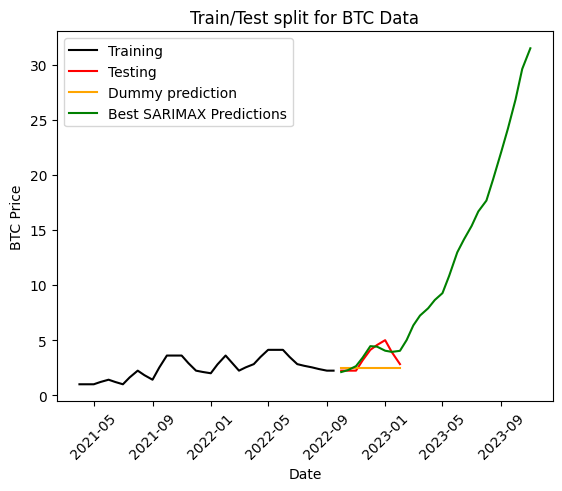

In [173]:
y_pred_out = srmx_y_pred_df["Predictions"] 
plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.plot(dummy_pred, color = "orange", label = 'Dummy prediction')
plt.plot(y_pred_out, color='green', label = 'Best SARIMAX Predictions')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.title("Train/Test split for BTC Data");

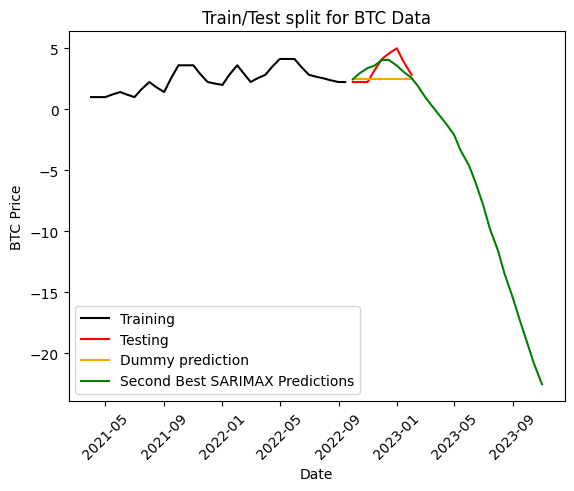

In [177]:
SARIMAXmodel = SARIMAX(train, order = (1, 4, 1), seasonal_order=(4, 1, 4, 3), enforce_invertibility=False)
SARIMAXmodel = SARIMAXmodel.fit(maxiter=200)
srmx_y_pred_df = srmx_y_pred.conf_int(alpha = 0.05) 
srmx_y_pred_df["Predictions"] = SARIMAXmodel.predict(start = srmx_y_pred_df.index[0], end = srmx_y_pred_df.index[-1])
y_pred_out = srmx_y_pred_df["Predictions"] 
plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.plot(dummy_pred, color = "orange", label = 'Dummy prediction')
plt.plot(y_pred_out, color='green', label = 'Second Best SARIMAX Predictions')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.title("Train/Test split for BTC Data");

In [137]:

results[0]

-1.0

In [129]:
cv_results.head(5)

,seasonal_orders,orders
0,"(1, 1, 1, 1)","(1, 1, 1)"
1,"(1, 1, 1, 1)","(1, 1, 2)"
2,"(1, 1, 1, 1)","(1, 1, 3)"
3,"(1, 1, 1, 1)","(1, 1, 4)"
4,"(1, 1, 1, 1)","(1, 1, 5)"


In [130]:
cv_results

,seasonal_orders,orders
0,"(1, 1, 1, 1)","(1, 1, 1)"
1,"(1, 1, 1, 1)","(1, 1, 2)"
2,"(1, 1, 1, 1)","(1, 1, 3)"
3,"(1, 1, 1, 1)","(1, 1, 4)"
4,"(1, 1, 1, 1)","(1, 1, 5)"
...,...,...
31995,"(4, 4, 4, 4)","(5, 5, 1)"
31996,"(4, 4, 4, 4)","(5, 5, 2)"
31997,"(4, 4, 4, 4)","(5, 5, 3)"
31998,"(4, 4, 4, 4)","(5, 5, 4)"
